In [2]:
from src.utils.results_utils import *

from src.utils.data_utils import str_dict_to_values

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\amaur\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\amaur\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [3]:
df_char_cleaned = pd.read_csv('data/cleaned.csv')

df_char_cleaned['Languages'] = df_char_cleaned['Languages'].apply(str_dict_to_values)
df_char_cleaned['Country'] = df_char_cleaned['Country'].apply(str_dict_to_values)
df_char_cleaned['Genres'] = df_char_cleaned['Genres'].apply(str_dict_to_values)

## Presenting the Data

In [4]:
df_char_cleaned.head()

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex,Actor_age,Release_date
0,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Akooshay,F,42.0,2001-08-24
1,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Melanie,F,27.0,2001-08-24
2,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Williams,M,32.0,2001-08-24
3,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Jericho,M,33.0,2001-08-24
4,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Bashira,F,23.0,2001-08-24


In [5]:
name_count = df_char_cleaned['Character_name'].nunique()
movie_count = df_char_cleaned['Wikipedia_ID'].nunique()

summary_df = pd.DataFrame({
    '': ['Unique Character Names', 'Unique Movies'],
    'Count': [name_count, movie_count]
})

summary_df.head()

,,Count
0,Unique Character Names,37518
1,Unique Movies,29626


In [6]:
name_counts = df_char_cleaned['Character_name'].value_counts()
top_100_names = name_counts.head(1000)

# Creating the interactive line plot with hover information
fig = go.Figure()

# Adding trace for the line plot with hover text
fig.add_trace(go.Scatter(
    x=top_100_names.index,
    y=top_100_names.values,
    mode='lines+markers',
    name='Character Count',
    line=dict(color='skyblue'),
    hovertext=[f"Name: {name}<br>Count: {count}" for name, count in zip(top_100_names.index, top_100_names.values)],
    hoverinfo="text"
))

# Setting up layout for the figure
fig.update_layout(
    title='Count of Most Popular Character Names',
    xaxis_title='Character Name',
    yaxis_title='Count',
    xaxis=dict(tickangle=45)
)

fig.show()

## Movie Genre Analysis

In [7]:
#Let's make a list of the genres we are interested in and assign one of them to each character
genres_list = ['Action & Adventure', 'Drama', 'Comedy', 'Horror & Thriller', 
              'Fantasy & Sci-Fi', 'Historical & War', 'Romance', 'Documentary', 
              'Music & Performance', 'Cult & B-Movies', 'Other']
df_char_cleaned['Genre_Category'] = df_char_cleaned['Genres'].apply(lambda x: categorize_genre(x))

In [8]:
#Let's see the most frequent names in each genre and for each gender
frequent_names_m, frequent_names_f = get_top_names_by_genre(df_char_cleaned,5)

In [9]:
data_f = create_sunburst_data(frequent_names_f)
data_m = create_sunburst_data(frequent_names_m)

In [10]:
# Create the sunburst plots for females and males
fig_females = go.Figure(go.Sunburst(
    labels=data_f['character'],
    parents=data_f['parent'],
    domain=dict(column=1),
    maxdepth=2
))

fig_males = go.Figure(go.Sunburst(
    labels=data_m['character'],
    parents=data_m['parent'],
    domain=dict(column=1),
    maxdepth=2
))

# Create a subplot with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Females", "Males"],
    specs=[[{"type": "sunburst"}, {"type": "sunburst"}]]
)

# Add the sunburst charts to the subplots
fig.add_trace(fig_females['data'][0], row=1, col=1)
fig.add_trace(fig_males['data'][0], row=1, col=2)

# Update the layout for the subplot
fig.update_layout(
    title_text="Comparison of Names by Gender",
    showlegend=False,
    width=1600,  # Width of the figure in pixels
    height=800,  # Height of the figure in pixels
    font=dict(size=10),  # Global font size, will affect other texts like titles
)

# Display the plot
fig.show()

In [11]:
#Now, let's see the number of appearences of each name in our dataset, and in which genres they appear
genre_counts_result, movies_with_name = count_name_appearance_by_genre(df_char_cleaned, genres_list, 'Leo')
genre_counts_result.head(15)

,Action & Adventure,Drama,Comedy,Horror & Thriller,Fantasy & Sci-Fi,Historical & War,Romance,Documentary,Music & Performance,Cult & B-Movies,Other
0,57,75,46,39,16,14,27,5,4,18,1


In [12]:
movies_with_name.head(5)

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex,Actor_age,Release_date,Genre_Category
466,21271533,Bleeder,[Danish Language],[Denmark],"[Thriller, Drama]",Leo,M,34.0,1999-08-06,"[Action & Adventure, Horror & Thriller, Drama]"
487,17379289,Without Warning,[English Language],[United States of America],"[Science Fiction, Horror]",Leo,M,60.0,1980-11-26,"[Fantasy & Sci-Fi, Horror & Thriller]"
2026,13934307,Mammoth,"[Tagalog language, English Language, Thai Lang...","[Denmark, Sweden, Germany]","[Drama, Indie, World cinema]",Leo,M,30.0,2009-11-20,"[Drama, Cult & B-Movies]"
5098,277710,Heartbreakers,"[Russian Language, English Language]",[United States of America],"[Crime Fiction, Romantic comedy, Romance Film,...",Leo,M,45.0,2001-03-23,"[Comedy, Romance]"
5962,21845518,Seis días en la oscuridad,[Spanish Language],[Mexico],"[Thriller, Crime Fiction, Drama]",Leo,M,NaN,2003-03-13,"[Action & Adventure, Horror & Thriller, Drama]"


On va 

In [13]:
def calculate_column_freq(df, column_name='Character_name'):
    """
    Calculate the count and frequency (percentage) of unique values in a specified column.
    """
    # Calculating the total number of entries in the specified column
    total_entries = df[column_name].count()
    
    # Counting occurrences of each unique value
    counts_df = df[column_name].value_counts().reset_index()
    counts_df.columns = [column_name, 'Count']
    
    # Adding a frequency column with the count divided by the total number of names, expressed as a percentage
    counts_df['Frequency (%)'] = counts_df['Count'] / total_entries * 100
    
    return counts_df

In [14]:
# Filtrer les lignes où le genre inclut "Thriller"
horror_thriller_df = df_char_cleaned[df_char_cleaned['Genre_Category'].apply(lambda genres: 'Horror & Thriller' in genres)]
horror_thriller_merged_df = horror_thriller_df.groupby('Character_name').size().reset_index(name='Horror & Thriller Count')

action_adventure_df = df_char_cleaned[df_char_cleaned['Genre_Category'].apply(lambda genres: 'Action & Adventure' in genres)]
action_adventure_merged_df = action_adventure_df.groupby('Character_name').size().reset_index(name='Action & Adventure Count')

# Grouper par 'Character_name' et compter le nombre d'occurrences
merged_df = pd.merge(
    action_adventure_merged_df, 
    horror_thriller_merged_df, 
    on='Character_name', 
    how='outer'  # Use outer join to include all names
)

merged_df = merged_df.fillna(0)

from scipy.stats import chi2_contingency

contingency_table = merged_df.drop(columns=['Character_name']).values

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2 Stat: 10929.588681328192
P-Value: 1.0
Degrees of Freedom: 20063
Expected Frequencies:
[[0.61837349 0.38162651]
 [0.61837349 0.38162651]
 [0.61837349 0.38162651]
 ...
 [0.61837349 0.38162651]
 [0.61837349 0.38162651]
 [1.23674697 0.76325303]]


## Gender Analysis

In [26]:
df_vowels, df_consonants = get_vowel_stats(df_char_cleaned)

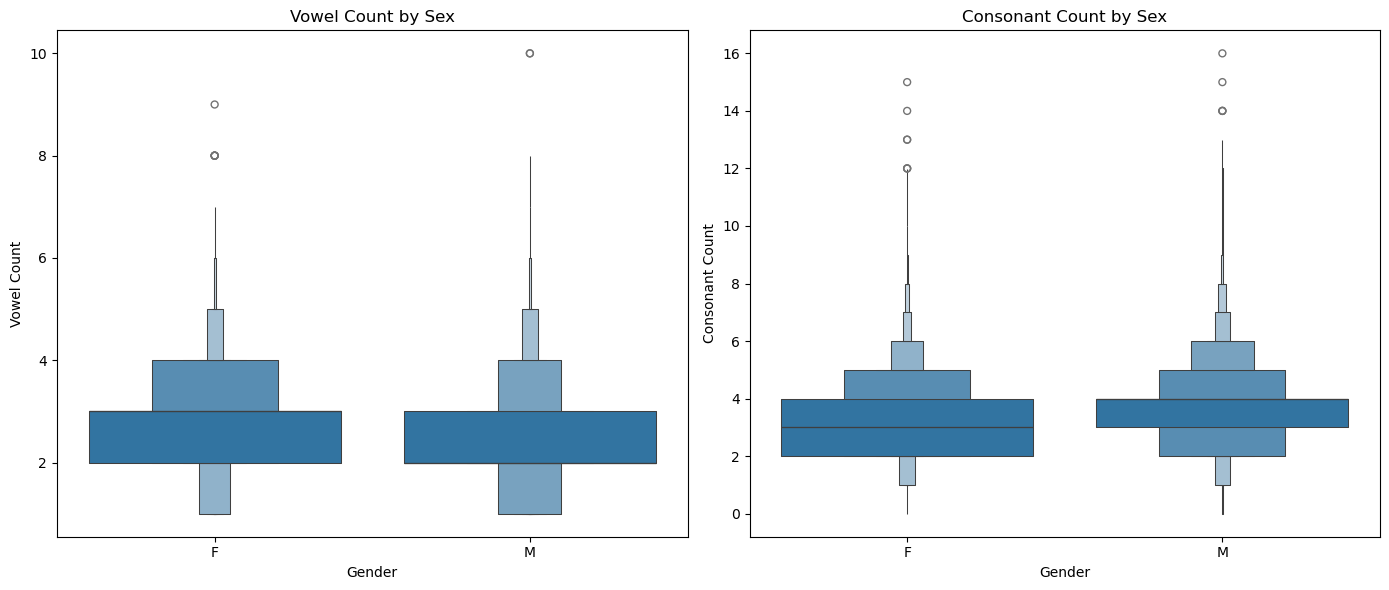

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for vowel count by sex
sns.boxenplot(data=df_char_cleaned, x='Sex', y='vowel_count', ax=axes[0])
axes[0].set_title('Vowel Count by Sex')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Vowel Count')

# Boxplot for consonant count by sex
sns.boxenplot(data=df_char_cleaned, x='Sex', y='consonant_count', ax=axes[1])
axes[1].set_title('Consonant Count by Sex')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Consonant Count')

plt.tight_layout()

In [18]:
df_length = get_length_stats(df_char_cleaned)

print('Length stats for character names by sex:')
print(df_length)

Length stats for character names by sex:
         mean       std
Sex                    
F    6.060847  1.653263
M    6.078445  1.849723


In [20]:
plot_letter_name_percentage(df_char_cleaned, 0)
plot_letter_name_percentage(df_char_cleaned, -1)

#### Analysis of the age distribution of the female and male names, with the most frequent names for each category

In [21]:
plot_age_sex_distribution_with_top_names(df_char_cleaned)

d:\ada-2024-project-adadasurmonbidet2024\src\utils\results_utils.py:290: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

d:\ada-2024-project-adadasurmonbidet2024\src\utils\results_utils.py:296: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Country Analysis

In [22]:
countries_code = []

df_continent = create_continent_df(df_char_cleaned,countries_code)
print(df_continent)

       Continent Female_name Male_name
0         Africa      Amina*     Omar*
1           Asia       Priya     Vijay
2         Europe       Marie      John
3  North America       Sarah      John
4        Oceania       Angie      John
5  South America        Dona      João


\* 3 other names are in a tie for this category. We choose to display only one name for readability

In this table we see the most recurrent character names for each continent. For Asia, we see that the most common names are indian names. Is it because other nearby countries are influenced by the bollywood industry or because India's movies are predominent in this dataset? 
We will try to answer the question by plotting the most common character names per country and reting it with the number of movies from this country in the dataset.

In [23]:
df_top_names = create_top_names_df(df_char_cleaned)
add_movie_count(df_char_cleaned,df_top_names)

In [24]:
df_top_names = cleaning_non_countries(df_top_names)

In [25]:


fig = go.Figure(go.Scattergeo(
))
fig.add_trace(go.Choropleth(
    locations= df_top_names['primary_country'],
    locationmode='country names',
    showscale= True,
    colorscale='YlOrRd',
    z=np.log10(df_top_names['Number_of_movies']),
    colorbar=dict(title="Number of movies (Log Scale)", tickvals=np.arange(0, 5), ticktext=[f"10^{i}" for i in range(0, 5)]),
    text= [f"Top female name: {female}<br>Top male name: {male}<br>Movies: {movies:,}" 
           for female, male, movies in zip(df_top_names['Female_name'], df_top_names['Male_name'], df_top_names['Number_of_movies'])],
    hovertemplate="%{location}<br>%{text}"
))
fig.update_geos(
    projection_scale=1,center={'lat': 30},
    visible=False,
    showcountries=True, countrycolor="RebeccaPurple"
)
fig.update_layout(
    geo=dict(
        projection_type="mercator",
        lakecolor="aqua"
    ),
    height=500,
    margin={"r":0,"t":5,"l":0,"b":0},
    title_text="Most Common Male and Female Names by Continent",
    title_xanchor="center",
    title_y=0.90
)
fig.show()